In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import re

In [4]:
song = pd.read_csv(r'songs.csv', index_col=0, header='infer')
song = song.dropna()
song.reset_index(drop=True, inplace=True)
song

,title,genre,lyrics
0,Abilene,Country/Bluegrass,Abilene Abilene prettiest town I've ever seen\...
1,Above And Beyond (The Call Of Love),Country/Bluegrass,Well I'll give you love that's above and beyon...
2,AC/DC Current,Jazz,"Y'all know me, still the same Eevee\nThe old 1..."
3,Acadian Driftwood,Folk/Roots,The war was over\nAnd the spirit was broken\nT...
4,Ac-Cent-Tchu-Ate The Positive,Swing,"Gather 'round me, everybody\nGather 'round me,..."
...,...,...,...
4754,Zeebob,Jazz,Part One Chapter 10\nTo Kill a Mockingbird\n\n...
4755,Zig Zag Wanderer,Rock/Pop,"Zig zag\n\nZig zag wanderer, zig zag wanderer\..."
4756,Ziggy Stardust,Rock/Pop,Ground Control to Major Tom\nGround Control to...
4757,Zip-A-Dee-Doo-Dah,Musical/Film,"Zip-a-dee-doo-dah\nZip-a-dee-yae\nMy, my, my, ..."


In [5]:
import texthero as hero
from texthero import preprocessing
custom_pipeline = [preprocessing.fillna,
                   preprocessing.remove_punctuation,
                   preprocessing.remove_whitespace,
                   preprocessing.remove_diacritics,
                   preprocessing.remove_stopwords
                  ]
song['clean_text'] = hero.clean(song['lyrics'], custom_pipeline)

In [6]:
song['clean_text'].head()

0    Abilene Abilene prettiest town I  ever seen Wo...
1    Well I  give  love     beyond  call  love And ...
2    Y  know  still   Eevee The old 133  I  low key...
3    The war   And  spirit  broken The hills  smoki...
4    Gather round  everybody Gather round   I preac...
Name: clean_text, dtype: object

In [62]:
song['tfidf'] = (hero.tfidf(song['clean_text'], max_features=100))

In [63]:
song['tfidf'].head()


0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1745541808842...
2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.07203927632983864,...
3    [0.0, 0.0, 0.0, 0.0, 0.0, 0.05349798491885164,...
4    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3701231110797...
Name: tfidf, dtype: object

In [64]:
song['tfidf'] = song['tfidf'].apply(lambda x: str(x).replace('[','').replace(']',''))
tempdf = song['tfidf'].apply(lambda x:pd.Series(str(x).split(',')))

In [65]:
tempdf.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.348802569757907,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.17455418088426292,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.09970588562761347,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.07203927632983864,0.01919152406324799,0.02520775342736831,0.10599602947938967,0.0,...,0.0,0.0,0.0,0.03847776400843443,0.0,0.06272009929563953,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.05349798491885164,0.1425205689469367,0.0,0.0,0.0,...,0.0,0.0,0.0608794886824449,0.0,0.048844912708545025,0.4191961923350799,0.0,0.0,0.13622361687303547,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.3701231110797632,0.0,0.0,0.3670483753439689,...,0.0,0.0,0.0,0.12367881497460437,0.0,0.0,0.0,0.0,0.0,0.0


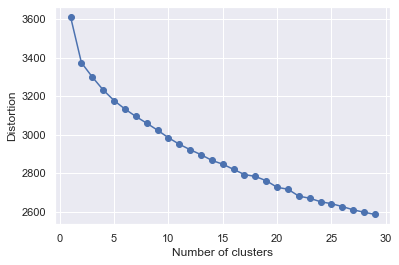

In [66]:
from sklearn.cluster import KMeans

# https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c
# calculate distortion for a range of number of cluster
X = tempdf.values
distortions = []
k_min = 1
k_max = 30
for i in range(k_min, k_max):
    km = KMeans(
        n_clusters=i, init='random',
        max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.figure()
plt.plot(range(k_min, k_max), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

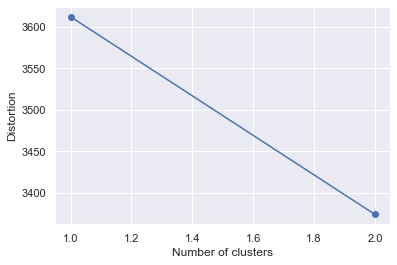

In [24]:
# need to zoom in at the bottom, since k = 1 - 3 got too high distortion
k_min = 1
k_max = 3
# plot
plt.figure()
plt.plot(range(k_min, k_max), distortions[0:2], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

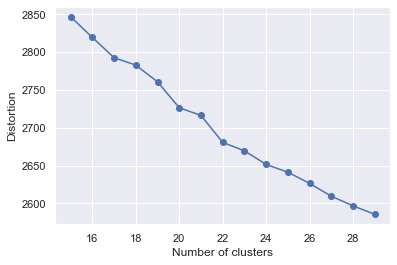

In [28]:
# need to zoom in at the bottom, since k = 6 - 20 got too high distortion
k_min = 15
k_max = 30
# plot
plt.figure()
plt.plot(range(k_min, k_max), distortions[14:29], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [46]:
# Here is the second approach using PCA and TSNE clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [84]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 100,
    stop_words = 'english'
)
tfidf.fit(song['clean_text'])
text = tfidf.transform(song['clean_text'])

In [83]:
print(text)

  (0, 8)	0.35122355139054684
  (0, 14)	0.40154796991773156
  (0, 17)	0.4330961066748223
  (0, 20)	0.4464375843701722
  (0, 21)	0.41341095913148707
  (0, 58)	0.39700613259543066
  (1, 3)	0.20483313907723555
  (1, 10)	0.15182269535061915
  (1, 20)	0.1374645624157306
  (1, 26)	0.13710406092686594
  (1, 27)	0.5101674385039537
  (1, 32)	0.09265282047321835
  (1, 49)	0.6603162385703082
  (1, 51)	0.10774559046261323
  (1, 56)	0.10325770088555765
  (1, 60)	0.12202195748328885
  (1, 88)	0.11605813586958014
  (1, 90)	0.1138658405812487
  (1, 91)	0.3589300569488807
  (2, 1)	0.13804838234135153
  (2, 3)	0.03687943544537328
  (2, 6)	0.06825666528253116
  (2, 7)	0.1283879860726744
  (2, 8)	0.17524280149475518
  (2, 11)	0.04844406150888291
  :	:
  (4758, 33)	0.5258273798950133
  (4758, 36)	0.06498594163692367
  (4758, 39)	0.18699365020412534
  (4758, 41)	0.039485870878303846
  (4758, 44)	0.05829717950227031
  (4758, 45)	0.03933937607652549
  (4758, 47)	0.6238832903205742
  (4758, 49)	0.26379163859624

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


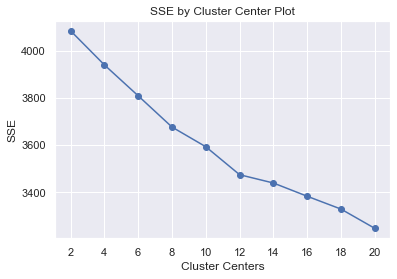

In [85]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

In [86]:
kmeans = MiniBatchKMeans(n_clusters=18, init_size=1024, batch_size=2048, random_state=20)
clusters = kmeans.fit_predict(text)

In [87]:
# dimensionality reduction for viz
import umap
data = text
# using UMAP as manifold model
# fig, ax = plt.subplots(figsize=(10, 10))
model_viz = umap.UMAP(n_neighbors=20, n_components=3)
reduced_emb = model_viz.fit_transform(data)

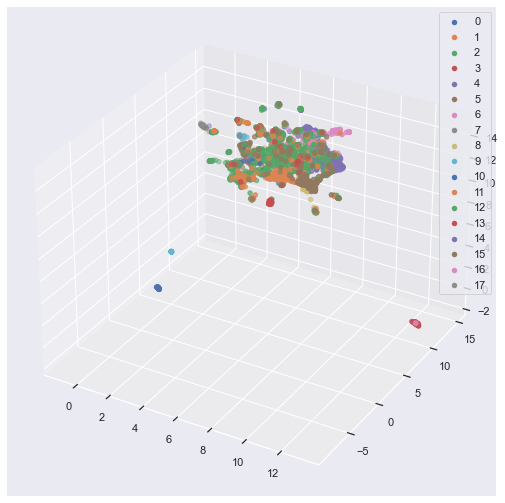

In [88]:
a = pd.DataFrame({'x':reduced_emb[:,2], 'y':reduced_emb[:,0], 'z':reduced_emb[:,1], 'label':kmeans.labels_})

plt.figure('K-Means on lyrics', figsize=(12,9))
ax = plt.axes(projection = '3d')

for i in range(kmeans.n_clusters):
    each = a[a.label==i][list('xyz')].values
    ax.scatter(each[:,2],each[:,1],each[:,0], label=f'{i}')

ax.legend()
plt.savefig(r'assets/3dviz.png')
plt.show()

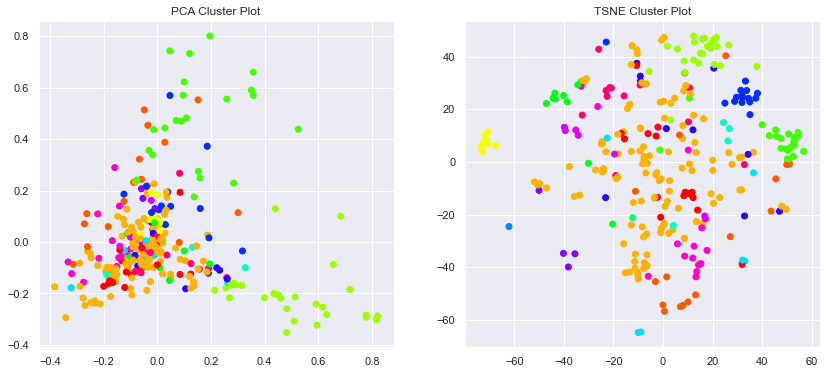

In [89]:
# Here we plot the clusters generated by our KMeans operation. One plot uses PCA which is better at capturing global structure of the data. The other uses TSNE which is better at capturing relations between neighbors. In order to speed up the process with TSNE, I sample from 3,000 documents and perform a PCA 50 dimension reduction on the data first. Next I show a scatterplot further sampling the sample down to 300 points
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)
    

In [90]:
# Clustering is an unsupervised operation, and KMeans requires that we specify the number of clusters. One simple approach is to plot the SSE for a range of cluster sizes. We look for the "elbow" where the SSE begins to level off. MiniBatchKMeans introduces some noise so I raised the batch and init sizes higher. Unfortunately the regular Kmeans implementation is too slow. You'll notice different random states will generate different charts. Here I chose 14 clusters
# Lastly, we'll cycle through the clusters and print out the top keywords based on their TFIDF score to see if we can spot any trends. I'll do this by computing an average value across all dimensions in Pandas, grouped by the cluster label. Using numpy, finding the top words is simply sorting the average values for each row, and taking the top N.
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
old,oh,think,way,time,got,man,know,like,said

Cluster 1
make,let,baby,cause,ooh,got,know,oh,like,yeah

Cluster 2
life,make,day,way,let,say,man,time,know,like

Cluster 3
ya,hey,dance,like,yeah,oh,yo,ah,come,la

Cluster 4
tell,day,life,oh,let,way,like,know,heart,love

Cluster 5
baby,let,night,got,ooh,like,love,know,yeah,oh

Cluster 6
home,say,know,baby,like,time,oh,love,let,come

Cluster 7
say,stop,cause,beat,right,baby,gonna,got,like,rock

Cluster 8
day,girl,got,old,know,like,way,oh,love,little

Cluster 9
say,feel,got,make,fuck,know,cause,god,like,boy

Cluster 10
yo,good,say,ya,know,got,like,hey,yeah,na

Cluster 11
want,like,got,yeah,girl,let,oh,know,love,baby

Cluster 12
oh,cause,got,don,time,love,like,need,know,want

Cluster 13
got,time,baby,ooh,hey,know,man,yeah,oh,ah

Cluster 14
love,way,baby,come,right,man,got,time,know,gonna

Cluster 15
let,way,good,make,yeah,cause,man,know,like,got

Cluster 16
way,come,home,old,know,like,time,gone,day,away

Cluster 17
let,love,eyes,bel